# Step 1: Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Load the data

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Step 3: Data preprocessing

In [4]:
# Handle missing values (if any)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Convert pickup_datetime to datetime type
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

# Extract additional features from pickup_datetime
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour
train_data['pickup_weekday'] = train_data['pickup_datetime'].dt.weekday

test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour
test_data['pickup_weekday'] = test_data['pickup_datetime'].dt.weekday

# Step 4: Exploratory Data Analysis (EDA)

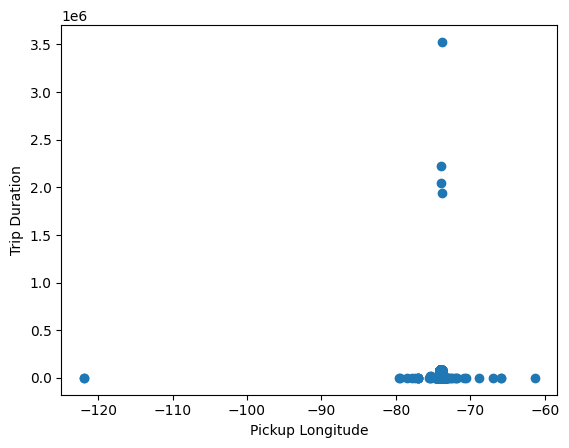

In [5]:
# Visualize relationships between variables
plt.scatter(train_data['pickup_longitude'], train_data['trip_duration'])
plt.xlabel('Pickup Longitude')
plt.ylabel('Trip Duration')
plt.show()


In [8]:
# Step 5: Feature selection
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target = 'trip_duration'

X = train_data[features]
y = train_data[target]


In [9]:
# Step 6: Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 7: Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Step 8: Model evaluation
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

Train RMSE: 5620.588928206162
Validation RMSE: 3247.3108678984745


In [12]:
# Step 9: Predictions
X_test = test_data[features]
y_test_pred = model.predict(X_test)

print("Predictions for the test data:")
print(y_test_pred)

Predictions for the test data:
[ 977.78443939 1380.65089069  975.39148666 ...  862.53967411  658.45029302
 1042.81442583]


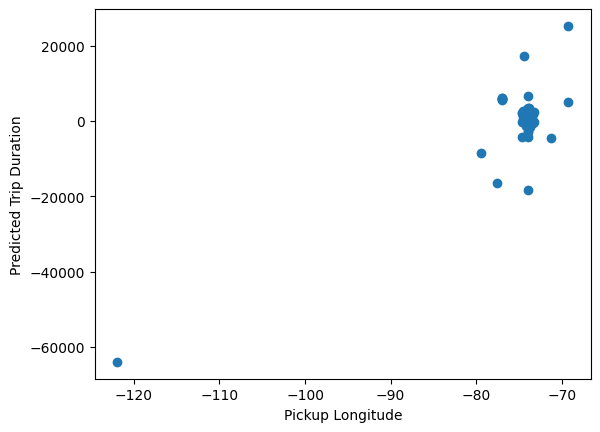

In [13]:
# Step 10: Visualize the results
plt.scatter(test_data['pickup_longitude'], y_test_pred)
plt.xlabel('Pickup Longitude')
plt.ylabel('Predicted Trip Duration')
plt.show()

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create the Ridge model
model = Ridge(alpha=0.1, fit_intercept=True, solver='auto')

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Evaluate the model on the training and validation sets
y_train_pred = model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = model.predict(X_val_scaled)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

# Generate final predictions
X_test = test_data[features]
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)

# Print final predictions
final_predictions = test_data[['id']].copy()
final_predictions['trip_duration_pred'] = y_test_pred
print("Final Predictions:")
print(final_predictions)

# Save predictions to a CSV file
final_predictions.to_csv('predictions.csv', index=False)


Train RMSE: 5620.588928206162
Validation RMSE: 3247.310867715911
Final Predictions:
               id  trip_duration_pred
0       id3004672          977.784438
1       id3505355         1380.650877
2       id1217141          975.391495
3       id2150126          951.952037
4       id1598245          890.482412
...           ...                 ...
625129  id3008929         1012.520545
625130  id3700764          811.761128
625131  id2568735          862.539744
625132  id1384355          658.450391
625133  id0621643         1042.814431

[625134 rows x 2 columns]
